In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import tensorflow as tf
from tensorflow.keras import Sequential,layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [48]:
pwd

'c:\\Users\\muham\\OneDrive\\Desktop\\data science\\Deep Learning\\Capstone\\Hurrican'

In [49]:
damage_tr = glob.glob('test/damage/*.jpeg')
no_damage_tr = glob.glob('test/no_damage/*.jpeg')

In [50]:
damage_ts = glob.glob('train/damage/*.jpeg')
no_damage_ts = glob.glob('train/no_damage/*.jpeg')

In [51]:
print(len(damage_tr))
print(len(damage_ts))
print(len(no_damage_tr))
print(len(no_damage_ts))

8471
6000
1865
6000


In [52]:
image_tr = []
label_tr = []
for i in damage_tr:
    img=plt.imread(i)
    image_tr.append(img)
    label_tr.append(0)

for i in no_damage_tr:
    img = plt.imread(i)
    image_tr.append(img)
    label_tr.append(1)

In [53]:
image_ts = []
label_ts = []
for i in damage_ts:
    img=plt.imread(i)
    image_ts.append(img)
    label_ts.append(0)

for i in no_damage_ts:
    img = plt.imread(i)
    image_ts.append(img)
    label_ts.append(1)

In [54]:
image_ts

[array([[[ 46,  68,  56],
         [ 50,  72,  60],
         [ 54,  76,  64],
         ...,
         [ 38,  67,  45],
         [ 38,  67,  45],
         [ 39,  68,  46]],
 
        [[ 48,  70,  58],
         [ 51,  73,  61],
         [ 55,  77,  65],
         ...,
         [ 40,  69,  47],
         [ 40,  69,  49],
         [ 40,  69,  47]],
 
        [[ 47,  69,  57],
         [ 49,  71,  59],
         [ 51,  73,  61],
         ...,
         [ 40,  69,  49],
         [ 39,  68,  50],
         [ 38,  67,  47]],
 
        ...,
 
        [[ 70,  95,  74],
         [ 66,  91,  70],
         [ 62,  89,  70],
         ...,
         [ 44,  74,  62],
         [ 45,  75,  63],
         [ 48,  78,  66]],
 
        [[ 65,  92,  73],
         [ 73, 100,  81],
         [ 66,  93,  74],
         ...,
         [ 56,  86,  74],
         [ 57,  87,  75],
         [ 58,  88,  76]],
 
        [[ 74, 101,  82],
         [ 64,  91,  72],
         [ 58,  85,  66],
         ...,
         [ 49,  79,  67],
  

In [55]:
image_tr , label_tr = shuffle(image_tr,label_tr)
image_ts , label_ts = shuffle(image_ts,label_ts)

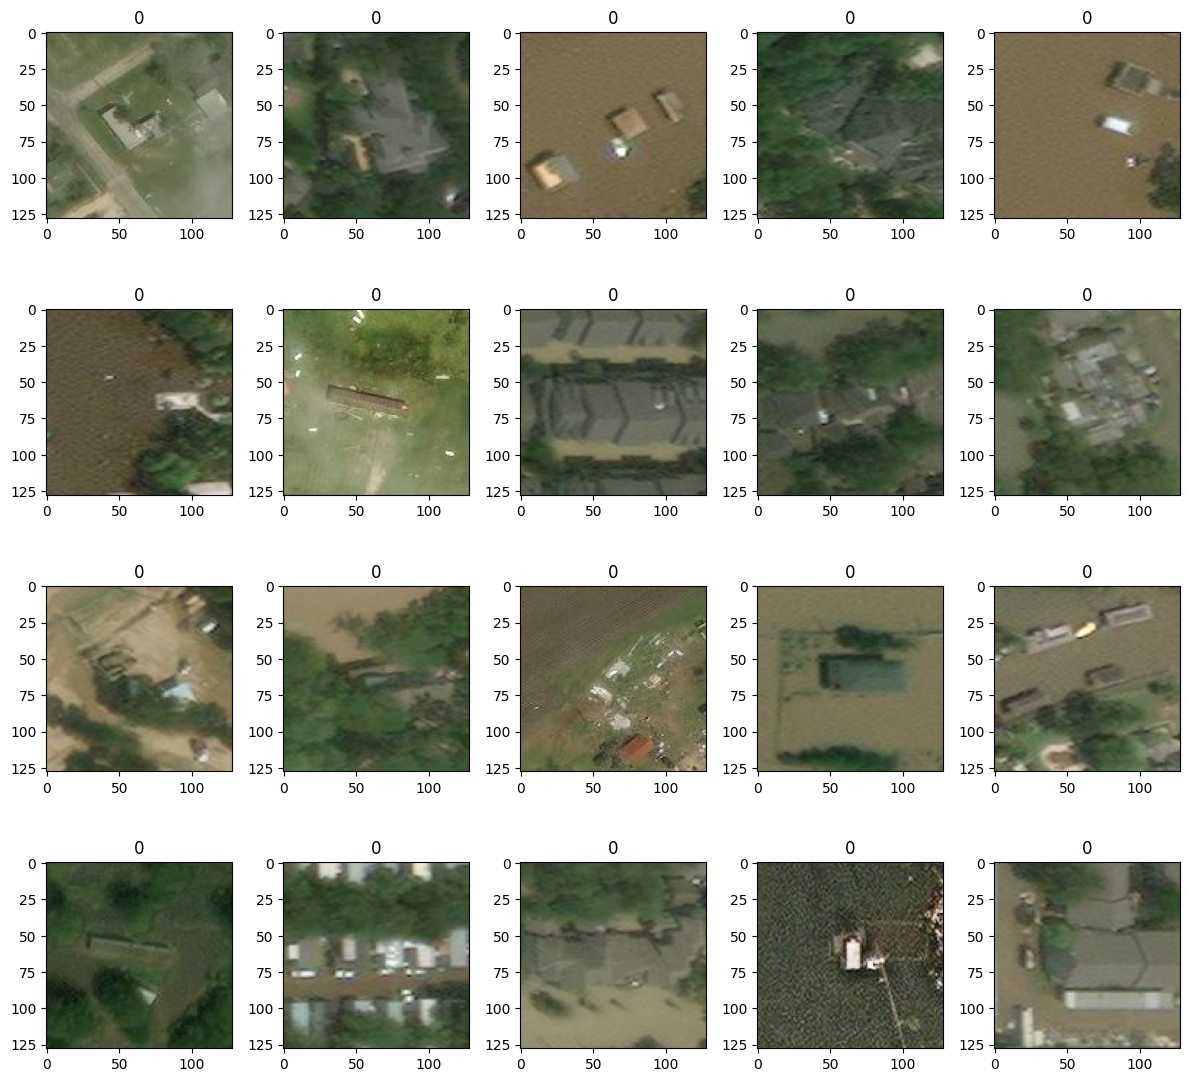

In [56]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(image_tr[i])
    plt.title(label_tr[i])
    plt.tight_layout()
    
# label 1 = no damage
# label 0 = damage

In [57]:
for i in range(10):
    print(image_tr[i].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [58]:
xtrain = []
for i in image_tr:
    xtrain.append(resize(i,(128,128,3)))
xtrain = np.array(xtrain)

xtest = []
for i in image_ts:
    xtest.append(resize(i,(128,128,3)))
xtest = np.array(xtest)

In [59]:
xtest

array([[[[0.1372549 , 0.18039216, 0.11764706],
         [0.09411765, 0.1372549 , 0.0745098 ],
         [0.09411765, 0.1372549 , 0.0745098 ],
         ...,
         [0.33333333, 0.39607843, 0.25490196],
         [0.3254902 , 0.38823529, 0.24705882],
         [0.30588235, 0.36862745, 0.22745098]],

        [[0.09803922, 0.14117647, 0.07843137],
         [0.12941176, 0.17254902, 0.10980392],
         [0.18039216, 0.22352941, 0.16078431],
         ...,
         [0.30196078, 0.36470588, 0.22352941],
         [0.30196078, 0.36470588, 0.22352941],
         [0.29411765, 0.35686275, 0.21568627]],

        [[0.09019608, 0.13333333, 0.07058824],
         [0.14117647, 0.18431373, 0.12156863],
         [0.18823529, 0.23137255, 0.16862745],
         ...,
         [0.2745098 , 0.33333333, 0.20392157],
         [0.28627451, 0.34901961, 0.20784314],
         [0.29803922, 0.36078431, 0.21960784]],

        ...,

        [[0.3372549 , 0.35294118, 0.22352941],
         [0.34117647, 0.35686275, 0.22745098]

In [60]:
ytrain = np.array(label_tr)
ytest = np.array(label_ts)

In [61]:
ytrain


array([0, 0, 0, ..., 0, 0, 0])

In [62]:
model = Sequential()
model.add(layers.Conv2D(16,(3,3),activation='elu',input_shape=(128,128,3)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='elu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='elu'))
model.add(layers.Dense(64,activation='elu'))
model.add(layers.Dense(1,activation='sigmoid'))  


c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
model.fit(xtrain,ytrain,epochs=4,validation_split=0.2,batch_size=15)

Epoch 1/4
552/552 ━━━━━━━━━━━━━━━━━━━━ 64s 108ms/step - accuracy: 0.8242 - loss: 0.5694 - val_accuracy: 0.8598 - val_loss: 0.4978
Epoch 2/4
552/552 ━━━━━━━━━━━━━━━━━━━━ 50s 90ms/step - accuracy: 0.9258 - loss: 0.1997 - val_accuracy: 0.8767 - val_loss: 0.4117
Epoch 3/4
552/552 ━━━━━━━━━━━━━━━━━━━━ 51s 92ms/step - accuracy: 0.9376 - loss: 0.1712 - val_accuracy: 0.8844 - val_loss: 0.5067
Epoch 4/4
552/552 ━━━━━━━━━━━━━━━━━━━━ 52s 93ms/step - accuracy: 0.9664 - loss: 0.0939 - val_accuracy: 0.8714 - val_loss: 0.7381


In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,099,813 (42.34 MB)

 Trainable params: 3,699,937 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,399,876 (28.23 MB)

In [66]:
model.evaluate(xtest,ytest)

375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.6716 - loss: 1.8263


[1.8101369142532349, 0.6699166893959045]

In [67]:
xtest

array([[[[0.1372549 , 0.18039216, 0.11764706],
         [0.09411765, 0.1372549 , 0.0745098 ],
         [0.09411765, 0.1372549 , 0.0745098 ],
         ...,
         [0.33333333, 0.39607843, 0.25490196],
         [0.3254902 , 0.38823529, 0.24705882],
         [0.30588235, 0.36862745, 0.22745098]],

        [[0.09803922, 0.14117647, 0.07843137],
         [0.12941176, 0.17254902, 0.10980392],
         [0.18039216, 0.22352941, 0.16078431],
         ...,
         [0.30196078, 0.36470588, 0.22352941],
         [0.30196078, 0.36470588, 0.22352941],
         [0.29411765, 0.35686275, 0.21568627]],

        [[0.09019608, 0.13333333, 0.07058824],
         [0.14117647, 0.18431373, 0.12156863],
         [0.18823529, 0.23137255, 0.16862745],
         ...,
         [0.2745098 , 0.33333333, 0.20392157],
         [0.28627451, 0.34901961, 0.20784314],
         [0.29803922, 0.36078431, 0.21960784]],

        ...,

        [[0.3372549 , 0.35294118, 0.22352941],
         [0.34117647, 0.35686275, 0.22745098]

In [68]:
pred = model.predict(xtest)

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step


In [69]:
int(float(pred[0][0]))

0

In [70]:
pred = [1 if i>.5 else 0 for i in pred]

In [71]:
pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [72]:
ytest

array([1, 0, 0, ..., 1, 1, 1])

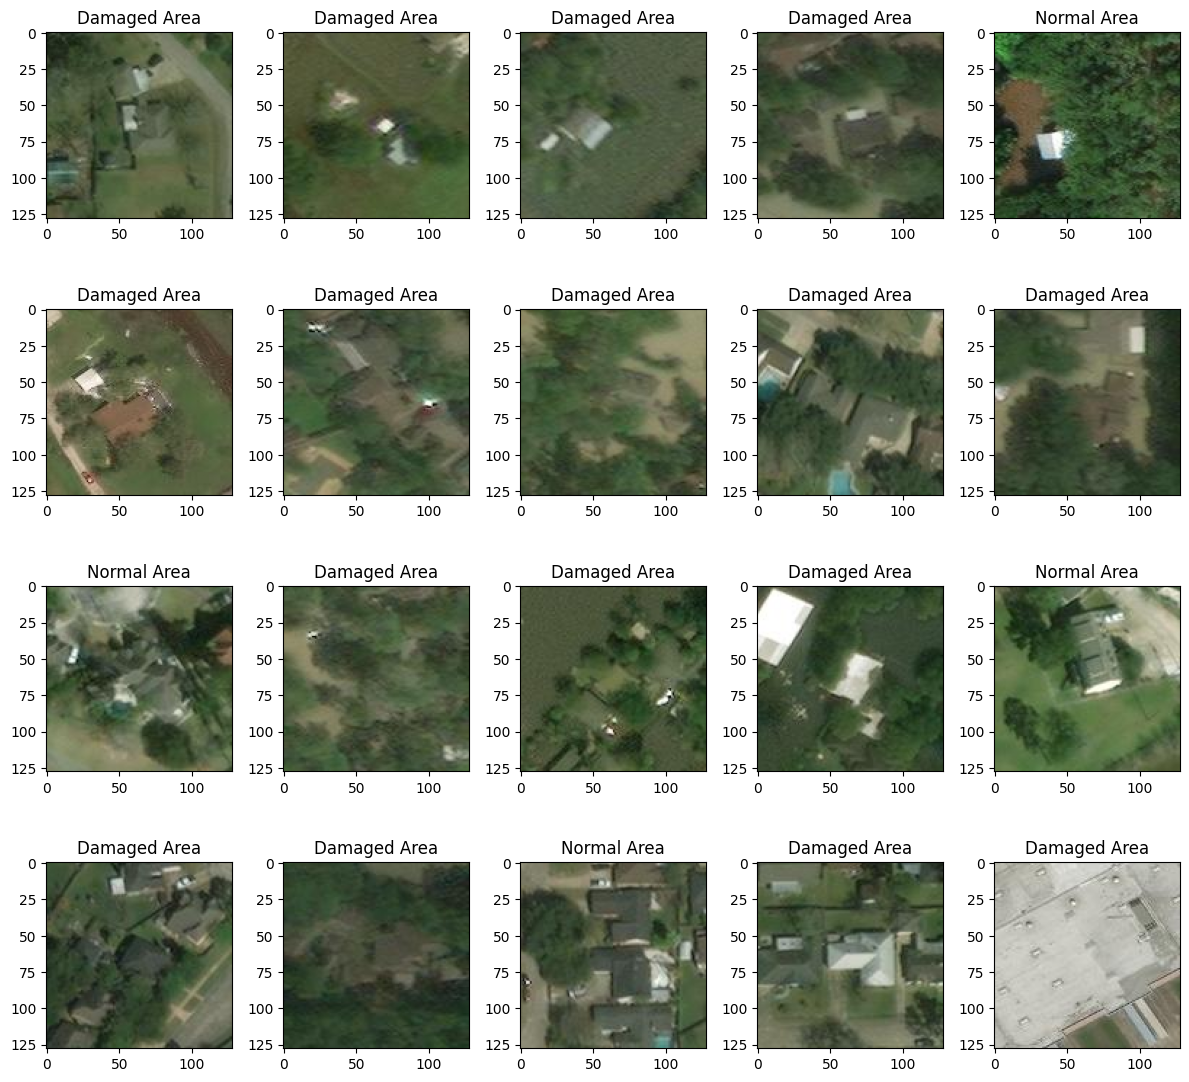

In [77]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(xtest[i])
    if pred[i]==0:
        plt.title('Damaged Area')
    else:
        plt.title('Normal Area')
    plt.tight_layout()

In [74]:
accuracy_score(ytest, pred)

0.6699166666666667

<Axes: >

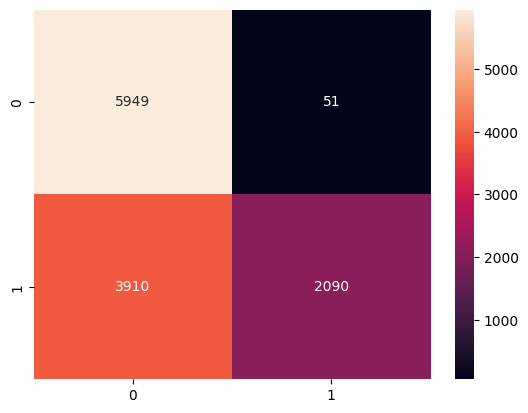

In [75]:
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [76]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      6000
           1       0.98      0.35      0.51      6000

    accuracy                           0.67     12000
   macro avg       0.79      0.67      0.63     12000
weighted avg       0.79      0.67      0.63     12000

